# Example of accessing raw data at CCIN2P3, example with Flats

This example allow to show where is the overscan


- work with Weakly_2021_36
- use jupyter kernel LSST



- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2022/03/04



In [60]:
! eups list -s | grep local

In [61]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.io import fits
import sqlite3

In [62]:
def read_sqlite(dbfile):
    import sqlite3
    from pandas import read_sql_query, read_sql_table

    with sqlite3.connect(dbfile) as dbcon:
        tables = list(read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", dbcon)['name'])
        out = {tbl : read_sql_query(f"SELECT * from {tbl}", dbcon) for tbl in tables}

    return out

In [63]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend("lsst.display.firefly")

In [64]:
FLAG_SAVE_IMAGE=False

In [65]:
!ls /sps/lsst/groups/auxtel/softs/shared/auxteldm

all_visits	       _mapper			run_ingestmasterbias.py~
all_visitsbias	       _mapper~			run_masterbiasing.sh
all_visitsdispersers   processConfig.py		run_masterbiasing.sh~
all_visitsflats        raw			run_masterflatting.sh
biasConfig.py	       README.md		run_processstar.sh
CALIB		       README.md~		run_processstar_v2.sh
flatConfig.py	       ref_cats			run_processstar_v2.sh~
flat.list	       registry.sqlite3		run_processstar_v3.sh
launchflats.sh	       repos			run_processstar_v3.sh~
launchprocessstar.sh   rerun			visit.list
launchprocessstar.sh~  run_ingestmasterbias.py


# Configuration

## Location and date

In [66]:
SOFT_VERSION="v0"

In [67]:
#from lsst.rapid.analysis.nightReport import NightReporter
# data exist here
repoDir='/sps/lsst/groups/auxtel/softs/shared/auxteldm'
registryfile=os.path.join(repoDir,'registry.sqlite3')
# recommended but wrong
#repoDir='project/shared/auxTel/rerun/mfl/slurmRun'
dayObs="2021-02-16"
#reporter=NightReporter(repoDir,dayObs)

# Selection

In [68]:
DISPERSER_SEL="holo4_003"

In [69]:
FLAG_FLAT_SELECTION=True

# Information from reporter

In [70]:
#print(reporter.getObservedObjects())

In [71]:
#reporter.makePolarPlotForObjects()

In [72]:
#reporter.plotPerObjectAirMass()

In [73]:
#reporter.printObsTable()

# Information from registry file

In [74]:
dict_db = read_sqlite(registryfile)

In [75]:
dict_db.keys()

dict_keys(['raw', 'sqlite_sequence', 'raw_visit'])

In [76]:
dat = sqlite3.connect(registryfile)

In [77]:
query = dat.execute("SELECT * From raw")

In [78]:
cols = [column[0] for column in query.description]

In [79]:
results= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)

In [80]:
results

,id,dayObs,seqNum,visit,detector,detectorName,filter,dateObs,date,expTime,object,imageType,wavelength,expGroup,obsid,expId
0,1,2021-06-08,1,2031133798900000,0,S00,RG610~holo4_003,2021-06-08T20:23:00.082,2021-06-08T20:23:00.082,0.0,azel_target,BIAS,-666,2021-06-08T20:22:59.890,AT_O_20210608_000001,2021060800001
1,2,2021-06-08,2,2031134348450000,0,S00,RG610~holo4_003,2021-06-08T20:23:55.021,2021-06-08T20:23:55.021,0.0,azel_target,BIAS,-666,2021-06-08T20:23:54.845,AT_O_20210608_000002,2021060800002
2,3,2021-06-08,3,2031134393460000,0,S00,RG610~holo4_003,2021-06-08T20:23:59.516,2021-06-08T20:23:59.516,0.0,azel_target,BIAS,-666,2021-06-08T20:23:59.346,AT_O_20210608_000003,2021060800003
3,4,2021-06-08,4,2031134438450000,0,S00,RG610~holo4_003,2021-06-08T20:24:04.019,2021-06-08T20:24:04.019,0.0,azel_target,BIAS,-666,2021-06-08T20:24:03.845,AT_O_20210608_000004,2021060800004
4,5,2021-06-08,5,2031134483610000,0,S00,RG610~holo4_003,2021-06-08T20:24:08.527,2021-06-08T20:24:08.527,0.0,azel_target,BIAS,-666,2021-06-08T20:24:08.361,AT_O_20210608_000005,2021060800005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12755,12756,2022-02-17,765,2251058140450000,0,S00,SDSSg~empty,2022-02-18T09:25:53.560,2022-02-18T09:25:53.560,30.0,LATISS_E6A_00000034,SKYEXP,-666,2022-02-18T09:23:34.045,AT_O_20220217_000765,2022021700765
12756,12757,2022-02-17,766,2251059032260000,0,S00,SDSSi~empty,2022-02-18T09:26:52.861,2022-02-18T09:26:52.861,30.0,LATISS_E6A_00000034,SKYEXP,-666,2022-02-18T09:25:03.226,AT_O_20220217_000766,2022021700766
12757,12758,2022-02-17,767,2251059032260000,0,S00,SDSSi~empty,2022-02-18T09:27:25.852,2022-02-18T09:27:25.852,30.0,LATISS_E6A_00000034,SKYEXP,-666,2022-02-18T09:25:03.226,AT_O_20220217_000767,2022021700767
12758,12759,2022-02-17,768,2251059905630000,0,S00,SDSSr~empty,2022-02-18T09:28:22.143,2022-02-18T09:28:22.143,30.0,LATISS_E6A_00000034,SKYEXP,-666,2022-02-18T09:26:30.563,AT_O_20220217_000768,2022021700768


In [81]:
results_sorted = results.sort_values(["dayObs", "seqNum"], ascending=True)

In [82]:
results_sorted

,id,dayObs,seqNum,visit,detector,detectorName,filter,dateObs,date,expTime,object,imageType,wavelength,expGroup,obsid,expId
8687,8688,2021-02-16,1,1934346219930000,0,S00,empty~empty,2021-02-16T19:50:22.184,2021-02-16T19:50:22.184,0.0,azel_target,BIAS,-666,2021-02-16T19:50:21.993,AT_O_20210216_000001,2021021600001
8688,8689,2021-02-16,2,1934362834080000,0,S00,empty~empty,2021-02-16T20:18:03.588,2021-02-16T20:18:03.588,0.0,azel_target,BIAS,-666,2021-02-16T20:18:03.408,AT_O_20210216_000002,2021021600002
8689,8690,2021-02-16,3,1934362963860000,0,S00,empty~empty,2021-02-16T20:18:16.563,2021-02-16T20:18:16.563,0.0,azel_target,BIAS,-666,2021-02-16T20:18:16.386,AT_O_20210216_000003,2021021600003
8690,8691,2021-02-16,4,1934363094110000,0,S00,empty~empty,2021-02-16T20:18:29.581,2021-02-16T20:18:29.581,0.0,azel_target,BIAS,-666,2021-02-16T20:18:29.411,AT_O_20210216_000004,2021021600004
8691,8692,2021-02-16,5,1934363223760000,0,S00,empty~empty,2021-02-16T20:18:42.546,2021-02-16T20:18:42.546,0.0,azel_target,BIAS,-666,2021-02-16T20:18:42.376,AT_O_20210216_000005,2021021600005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12755,12756,2022-02-17,765,2251058140450000,0,S00,SDSSg~empty,2022-02-18T09:25:53.560,2022-02-18T09:25:53.560,30.0,LATISS_E6A_00000034,SKYEXP,-666,2022-02-18T09:23:34.045,AT_O_20220217_000765,2022021700765
12756,12757,2022-02-17,766,2251059032260000,0,S00,SDSSi~empty,2022-02-18T09:26:52.861,2022-02-18T09:26:52.861,30.0,LATISS_E6A_00000034,SKYEXP,-666,2022-02-18T09:25:03.226,AT_O_20220217_000766,2022021700766
12757,12758,2022-02-17,767,2251059032260000,0,S00,SDSSi~empty,2022-02-18T09:27:25.852,2022-02-18T09:27:25.852,30.0,LATISS_E6A_00000034,SKYEXP,-666,2022-02-18T09:25:03.226,AT_O_20220217_000767,2022021700767
12758,12759,2022-02-17,768,2251059905630000,0,S00,SDSSr~empty,2022-02-18T09:28:22.143,2022-02-18T09:28:22.143,30.0,LATISS_E6A_00000034,SKYEXP,-666,2022-02-18T09:26:30.563,AT_O_20220217_000768,2022021700768


In [83]:
list_of_imgtype = results_sorted['imageType'].unique()
list_of_imgtype 

array(['BIAS', 'FLAT', 'SKYEXP', 'ENGTEST', 'DARK'], dtype=object)

In [84]:
list_of_filters = results_sorted['filter'].unique()
list_of_filters

array(['empty~empty', 'RG610~empty', 'RG610~holo4_003', 'empty~holo4_003',
       'empty~ronchi90lpmm', 'RG610~ronchi90lpmm',
       'quadnotch1~ronchi90lpmm', 'BG40~empty', 'BG40~ronchi90lpmm',
       'RG610~ronchi170lpmm', 'BG40~holo4_003', 'unknown~unknown',
       'FELH0600~holo4_003', 'FELH0600~empty', 'FELH0600~ronchi170lpmm',
       'empty~ronchi170lpmm', 'quadnotch1~ronchi170lpmm',
       'BG40~ronchi170lpmm', 'quadnotch1~holo4_003',
       'FELH0600~ronchi90lpmm', 'SDSSg~empty', 'SDSSg~ronchi170lpmm',
       'SDSSg~holo4_003', 'quadnotch1~empty', 'SDSSr~empty',
       'SDSSi~empty', 'SDSSr~holo4_003'], dtype=object)

In [85]:
selected_filters = []
for filt in list_of_filters:
    flag_sel = (filt.find('holo4') != -1) or (filt.find('ronchi90lpmm') != -1) or (filt.find('ronchi170lpmm') != -1)
    if flag_sel:
        selected_filters.append(filt) 
selected_filters = np.array(selected_filters)
selected_filters       

array(['RG610~holo4_003', 'empty~holo4_003', 'empty~ronchi90lpmm',
       'RG610~ronchi90lpmm', 'quadnotch1~ronchi90lpmm',
       'BG40~ronchi90lpmm', 'RG610~ronchi170lpmm', 'BG40~holo4_003',
       'FELH0600~holo4_003', 'FELH0600~ronchi170lpmm',
       'empty~ronchi170lpmm', 'quadnotch1~ronchi170lpmm',
       'BG40~ronchi170lpmm', 'quadnotch1~holo4_003',
       'FELH0600~ronchi90lpmm', 'SDSSg~ronchi170lpmm', 'SDSSg~holo4_003',
       'SDSSr~holo4_003'], dtype='<U24')

In [86]:
def isbias(row):
    #print(row["filter"])
    if str(row["imageType"]) == "BIAS":
        return True
    
    else:
        return False 

In [87]:
def isflat(row):
    #print(row["filter"])
    if str(row["imageType"]) == "FLAT":
        return True
    
    else:
        return False 

In [88]:
def isdisperser(row):
    #print(row["filter"])
    if str(row["filter"]) in selected_filters:
        return True
    
    else:
        return False    

## Select flats

In [89]:
results_sorted["selected"] = results_sorted.apply(isflat,axis=1)

In [90]:
results_selected = results_sorted[results_sorted["selected"]==1]

In [91]:
list_of_dates_flats = results_selected['dayObs'].unique() 
list_of_dates_flats

array(['2021-02-16', '2021-02-17', '2021-02-18', '2021-03-11',
       '2021-06-08', '2021-06-09', '2021-07-07', '2021-07-08',
       '2021-09-07', '2021-09-08', '2021-09-09', '2021-10-05',
       '2021-10-06', '2021-10-07', '2021-11-02', '2021-11-04',
       '2022-02-15', '2022-02-16', '2022-02-17'], dtype=object)

In [92]:
night_sel='2022-02-16'

In [93]:
cut = results_selected['dayObs'] == night_sel 

In [94]:
df = results_selected[cut]

In [95]:
df

,id,dayObs,seqNum,visit,detector,detectorName,filter,dateObs,date,expTime,object,imageType,wavelength,expGroup,obsid,expId,selected
11262,11263,2022-02-16,45,2249737236410000,0,S00,SDSSr~empty,2022-02-16T20:42:03.809,2022-02-16T20:42:03.809,1.0,FlatField position,FLAT,-666,2022-02-16T20:42:03.641,AT_O_20220216_000045,2022021600045,True
11263,11264,2022-02-16,46,2249737274190000,0,S00,SDSSr~empty,2022-02-16T20:42:07.429,2022-02-16T20:42:07.429,1.0,FlatField position,FLAT,-666,2022-02-16T20:42:07.419,AT_O_20220216_000046,2022021600046,True
11264,11265,2022-02-16,47,2249737310310000,0,S00,SDSSr~empty,2022-02-16T20:42:11.039,2022-02-16T20:42:11.039,1.0,FlatField position,FLAT,-666,2022-02-16T20:42:11.031,AT_O_20220216_000047,2022021600047,True
11265,11266,2022-02-16,48,2249737346420000,0,S00,SDSSr~empty,2022-02-16T20:42:14.650,2022-02-16T20:42:14.650,1.0,FlatField position,FLAT,-666,2022-02-16T20:42:14.642,AT_O_20220216_000048,2022021600048,True
11266,11267,2022-02-16,49,2249737382620000,0,S00,SDSSr~empty,2022-02-16T20:42:18.276,2022-02-16T20:42:18.276,1.0,FlatField position,FLAT,-666,2022-02-16T20:42:18.262,AT_O_20220216_000049,2022021600049,True
11267,11268,2022-02-16,50,2249737418840000,0,S00,SDSSr~empty,2022-02-16T20:42:21.900,2022-02-16T20:42:21.900,1.0,FlatField position,FLAT,-666,2022-02-16T20:42:21.884,AT_O_20220216_000050,2022021600050,True
11268,11269,2022-02-16,51,2249737455090000,0,S00,SDSSr~empty,2022-02-16T20:42:25.523,2022-02-16T20:42:25.523,1.0,FlatField position,FLAT,-666,2022-02-16T20:42:25.509,AT_O_20220216_000051,2022021600051,True
11269,11270,2022-02-16,52,2249737491240000,0,S00,SDSSr~empty,2022-02-16T20:42:29.137,2022-02-16T20:42:29.137,1.0,FlatField position,FLAT,-666,2022-02-16T20:42:29.124,AT_O_20220216_000052,2022021600052,True
11270,11271,2022-02-16,53,2249737527550000,0,S00,SDSSr~empty,2022-02-16T20:42:32.762,2022-02-16T20:42:32.762,1.0,FlatField position,FLAT,-666,2022-02-16T20:42:32.755,AT_O_20220216_000053,2022021600053,True
11271,11272,2022-02-16,54,2249737563730000,0,S00,SDSSr~empty,2022-02-16T20:42:36.385,2022-02-16T20:42:36.385,1.0,FlatField position,FLAT,-666,2022-02-16T20:42:36.373,AT_O_20220216_000054,2022021600054,True


# Butler

## Configuration for Butler

In [96]:
#butler=dafPersist.Butler("/project/shared/auxTel")
butler=dafPersist.Butler(repoDir)

CameraMapper INFO: Loading exposure registry from /sps/lsst/groups/auxtel/softs/shared/auxteldm/registry.sqlite3
CameraMapper INFO: Loading calib registry from /sps/lsst/groups/auxtel/softs/shared/auxteldm/CALIB/calibRegistry.sqlite3


## Sequence selection

In [131]:
# Flats
all_myseq_flats=range(45,65)

# wide scan
# -----------
#all_myseq_holo=range(234,310)
# narrow scan
#-----------
all_myseq_holo=range(317,365)

if FLAG_FLAT_SELECTION:
    all_myseq=all_myseq_flats
else:
    all_myseq=all_myseq_holo

In [132]:
seqNum=all_myseq[-1]

In [133]:
seqNum

64

## Display

In [134]:
#display1=afwDisplay.getDisplay(frame=1,port=80,name='sylviedc_debug_2021_07_07',url=os.environ["FIREFLY_URL"])

In [135]:
print(butler.queryMetadata('raw','seqNum',dayObs=dayObs))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [136]:
raw=butler.get('raw',dayObs=dayObs,seqNum=seqNum)
md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)

(minimum=(0, 0), maximum=(543, 2047)): (minimum=(0, 0), maximum=(575, 2047))
argDict[boresightAirmass] is None; stripping


CameraMapper WARN: Cannot create SkyWcs using VisitInfo and Detector, using metadata-based SkyWcs: Cannot create SkyWcs from camera geometry: rotator angle defined using RotType=RotType.UNKNOWN instead of SKY.


## meta data

In [137]:
md.toDict()

{'SIMPLE': True,
 'EXTEND': True,
 'COMMENT': ["  FITS (Flexible Image Transport System) format is defined in 'Astronomy",
  "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H",
  "= '        '",
  '---- Date, night and basic image information ----',
  "= '        '",
  '---- Telescope info, location, observer ----',
  "= '        '",
  '---- Pointing info, etc. ----',
  "= '        '",
  '---- TAN Projection ----',
  "= '        '",
  '---- Image-identifying used to build OBS-ID ----',
  "= '        '",
  '---- Test Stand information ----',
  "= '        '",
  '---- Information from Camera (Common block) ----',
  "= '        '",
  '---- Information from Camera ----',
  "= '        '",
  '---- Filter/grating information ----',
  "= '        '",
  '---- Exposure-related information ----',
  "= '        '",
  '---- Weather information ----',
  "= '        '",
  '---- Header information ----',
  "= '        '",
  '---- Checksums ----',
  '---- Information from Camera

## Image

In [138]:
raw_image=raw.image.array

In [139]:
raw_image.shape

(4096, 4608)

In [140]:
# Must flip for Spectractor reading
flip_image=np.flip(raw_image, 0)

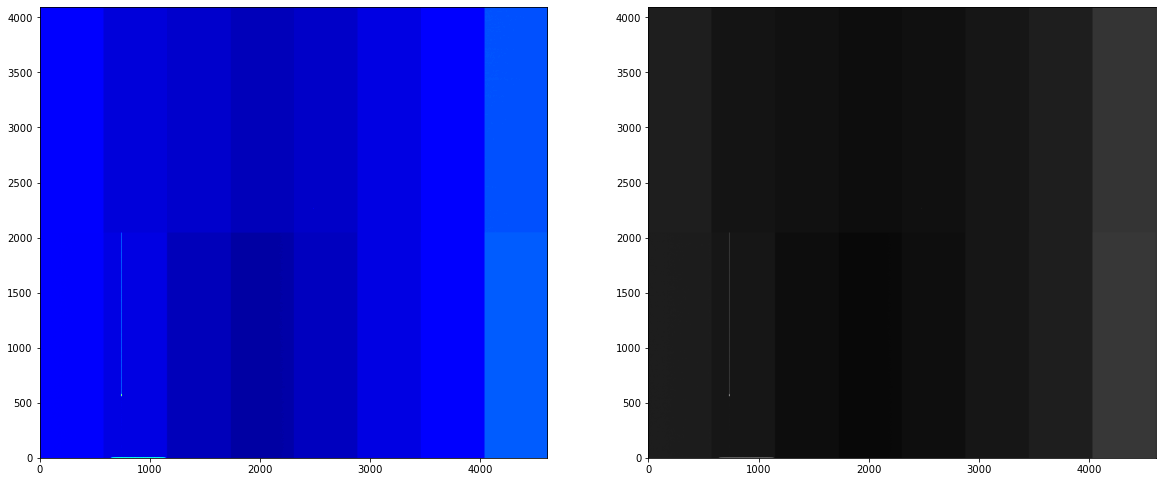

In [141]:
fig = plt.figure(figsize=(20,10))
ax=fig.add_subplot(121)
ax.imshow(flip_image,origin='lower',cmap="jet",norm=LogNorm())
ax=fig.add_subplot(122)
ax.imshow(flip_image,origin='lower',cmap="gray",norm=LogNorm())
plt.show()

# Supress overscan

In [142]:
profile_x=raw_image.sum(axis=0)
profile_y=raw_image.sum(axis=1)

In [143]:
diff_profile_x=np.diff(profile_x,prepend=0,append=0)
diff_profile_y=np.diff(profile_y,prepend=0,append=0)

Text(0.5, 0, 'y')

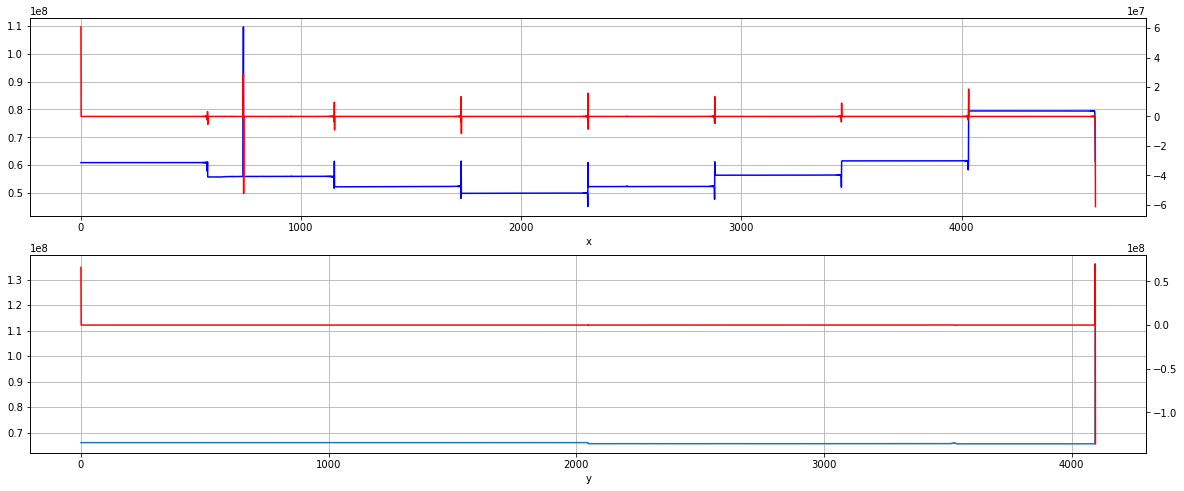

In [144]:
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(2,1,1)           
ax.plot(profile_x,'b-')
ax.grid()
ax2=ax.twinx()
ax2.plot(diff_profile_x,'r-')

ax.set_xlabel('x')
ax=fig.add_subplot(2,1,2)     
ax.grid()
ax.plot(profile_y)
ax2=ax.twinx()
ax2.plot(diff_profile_y,'r-')
ax.set_xlabel('y')

In [145]:
np.where(diff_profile_x<-2e-8)[0]

array([   3,    5,    7, ..., 4606, 4607, 4608])

In [146]:
np.where(diff_profile_x>2e-8)[0]

array([   0,    1,    2, ..., 4599, 4602, 4604])

In [147]:
np.where(diff_profile_y<-2e-8)[0]

array([   1,    2,    4, ..., 4091, 4093, 4096])

In [148]:
np.where(diff_profile_y>2e-8)[0]

array([   0,    3,    5, ..., 4092, 4094, 4095])

In [149]:
indexes_x_set0=np.where(profile_x<1e8)[0]
indexes_x_set0

array([   0,    1,    2, ..., 4605, 4606, 4607])

In [150]:
indexes_y_set0=np.where(profile_y<1e8)[0]
indexes_y_set0

array([   0,    1,    2, ..., 4092, 4093, 4094])

In [151]:
#np.savetxt('indexes_x_set0.txt', indexes_x_set0, delimiter=',')  
#np.savetxt('indexes_y_set0.txt', indexes_y_set0, delimiter=',')  
# load indexes generated from flat file
indexes_x_set0=np.loadtxt('data/indexes_x_set0.txt',delimiter=',').astype(int)
indexes_y_set0=np.loadtxt('data/indexes_y_set0.txt',delimiter=',').astype(int)

In [152]:
raw_image[:,indexes_x_set0]=0
raw_image[indexes_y_set0,:]=0

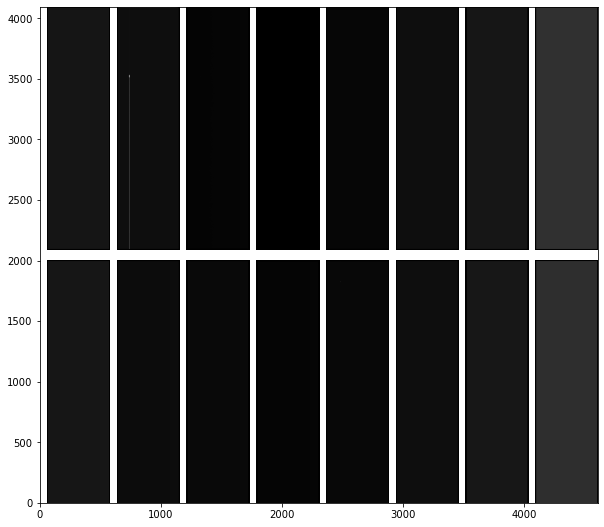

In [153]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

ax.imshow(raw_image,origin='lower',cmap="gray",norm=LogNorm())
plt.show()

In [154]:
data_noemptycolumn = raw_image[:,~np.all(raw_image == 0, axis=0)]

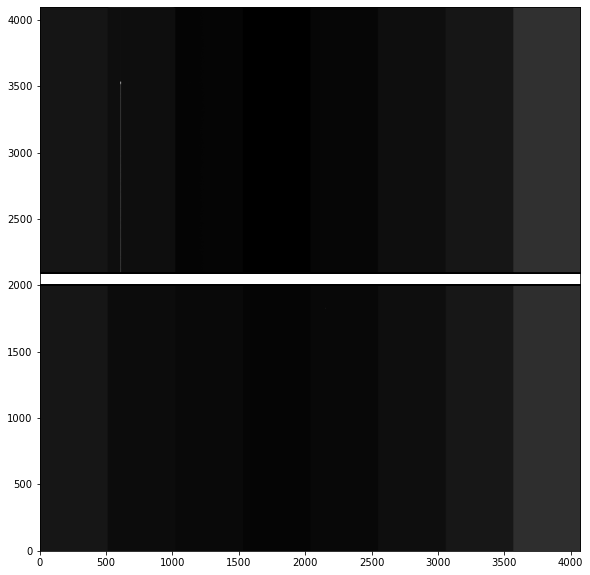

In [155]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
plt.imshow(data_noemptycolumn,origin='lower',cmap="gray",norm=LogNorm())

In [156]:
data_noemptyrow = data_noemptycolumn[~np.all(raw_image == 0, axis=1),:]

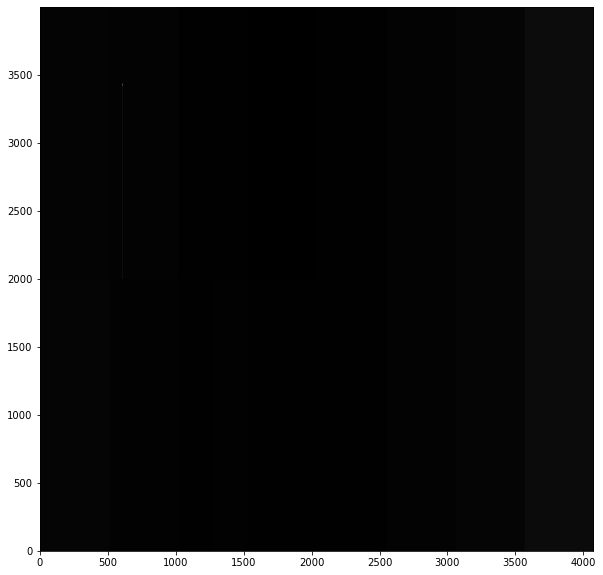

In [157]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
#plt.imshow(data_noemptyrow,origin='lower',cmap="gray",norm=LogNorm())
plt.imshow(data_noemptyrow,origin='lower',cmap="gray")

In [158]:
data=data_noemptyrow

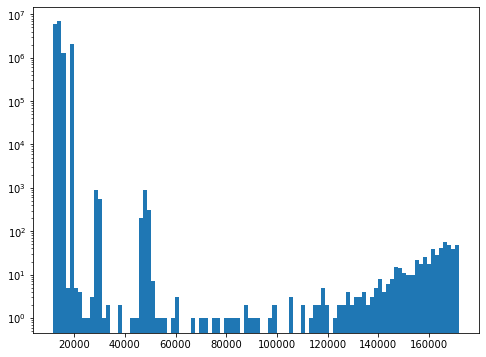

In [159]:
fig = plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
flat_array=np.ravel(data)
ax.hist(flat_array,bins=100);
ax.set_yscale('log')

In [160]:
data.shape

(4000, 4072)